# PS-DTFE Julia

#28 (generic function with 1 method)

In [2]:
using Plots
macro h(x); quote; display("text/markdown", @doc $x); end; end
include("density.jl")

# Set up box
Ni = 256
L = 25.
m = (L / Ni) ^ 2
rangeX = -0.05 * L : L / (8. * Ni) : 0.05 * L

# Load data
positions_initial = Matrix{Float64}(undef, 2, Ni^2)
positions = Matrix{Float64}(undef, 2, Ni^2)
velocities = Matrix{Float64}(undef, 2, Ni^2)

read!("data/positions_initial.bin", positions_initial)
read!("data/positions.bin", positions)
read!("data/velocities.bin", velocities)

positions_initial = copy(positions_initial')
positions = copy(positions')
velocities = copy(velocities')

# Evaluate density estimator
box = [-L  L; -L L]
depth = 10
estimator = ps_dtfe_constructor(positions_initial, positions, velocities, m, depth, box)

p = [0., 0.] 

println("density: ", density(p, estimator))

println("velocity: ", v(p, estimator))

println("number of streams: ", numberOfStreams(p, estimator))

density: 176.74570019702483
velocity: [9.240223547772283 -182.06197057407758; -72.0335493878694 -157.47626126799045; -138.62865408956623 -44.1477038965086; -14.138369384522584 -301.9810681244975; -36.73959929910339 -286.3936632886488; 289.88224134285053 -357.0313364336909; -361.60331438498946 -211.07321241480238; -228.93018081200483 -232.9264361575794; -272.2201131180021 -316.5804686336685; -121.99349473603232 -200.93935833358216; 180.52646213439408 -236.49470804961538; -45.8560800328332 -282.3786059728758; -76.31262965791916 -263.7011204791138; -22.066400986263925 -293.8119250624257; 136.05348771889575 -335.52504419270235; -181.22647876713398 -125.43171772848747; 67.58881779603668 -152.41118231995856; -15.500493775611671 -106.90628300022166; 60.5150496544463 -314.3963946491795; -106.65684008836553 -264.6739019789921; -191.87254657761343 -237.21329723416622; -68.13956456018481 -87.63669163380597; -44.89179092136231 42.00845931225948; 95.00293046199013 -154.6870153965707; 113.2321906404

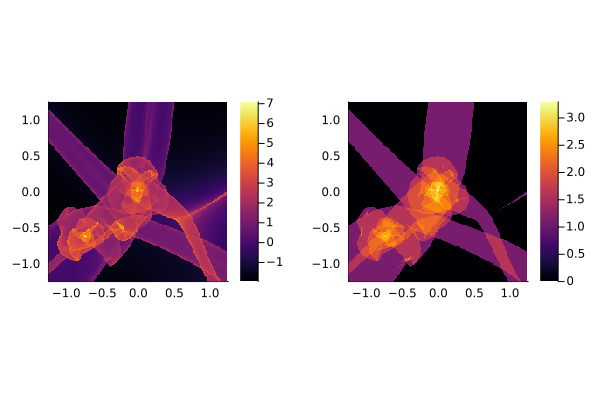

In [6]:
rho = [density([x, y], estimator) for y in rangeX, x in rangeX]
number = [numberOfStreams([x, y], estimator) for y in rangeX, x in rangeX]

write("data/density_PS-DTFE_Julia.bin", rho)
write("data/number_PS-DTFE_Julia.bin", number)

pl1 = heatmap(rangeX, rangeX, log.(rho), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L))
pl2 = heatmap(rangeX, rangeX, log.(number), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L))

plot(pl1, pl2)